# Clustering algorithms

In this notebook, we will learn about two kinds of clustering algorithms (k-means and agglomerative clustering), but also about the intuition behind how clustering works. We will also perform clustering on text documents.

**Table of Contents**  

1. [Preparing Synthetic Data](#sec1)
2. [K-Means](#sec2)
3. [Agglomerative Clustering](#sec3)
4. [Distances used in clustering](#sec4)
5. [Clustering text documents with k-means](#sec5) 

<a id="sec1"></a>

## 1. Preparing synthetic data

We will generate a synthetic data set that has natural clusters and then will use clustering functions 
to see  how well they work. We are doing this, because otherwise it would be difficult to know whether the agorithms were able to find meaningful clusters.

In [4]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn
plt.style.use('ggplot')

Here is the function that will create the synthetic data:

In [5]:
from sklearn.datasets import make_blobs 

Let's look up the documentation for `make_blobs` to find out how to use it:

In [6]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    For an example of usage, see
    :ref:`sphx_glr_auto_examples_datasets_plot_random_dataset.py`.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or array-like of shape (n_centers, n_features), 

Now that we know how to call `make_blob`, we can generate a dataset. Notice the importance of the feature `random_state`. That ensures that we can reproduce the values whenever we run the notebook.

I want to create data that is groued in four clusters.

In [7]:
X, y_true = make_blobs(n_samples=120, 
                       centers=4,
                       cluster_std=0.40, 
                       random_state=0)

print(X.shape)
print(y_true.shape)

(120, 2)
(120,)


We just created the matrix `X` that has 120 rows (one for each sample) with two columns each (meaning two features), and the vector `y_true`, that has 120 values, indicating which cluster (or blob) a data sample (or instance) belongs to.

In [8]:
y_true

array([2, 3, 1, 0, 0, 1, 2, 2, 1, 1, 3, 0, 3, 3, 3, 0, 1, 2, 2, 0, 3, 3,
       2, 0, 3, 2, 1, 2, 2, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2,
       2, 0, 3, 3, 0, 0, 0, 3, 1, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 1, 3, 1,
       2, 3, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       3, 2, 2, 2, 1, 1, 3, 1, 1, 0, 3, 0, 3, 3, 2, 1, 3, 0, 0, 3, 2, 2,
       3, 3, 3, 3, 3, 2, 2, 0, 2, 3])

Let's check that we have the same number of values in each blob, by counting unique values with np:

In [9]:
import numpy as np

np.unique(y_true, return_counts=True)

(array([0, 1, 2, 3]), array([30, 30, 30, 30]))

X is a two-dimensional array, every point has two feature values (so that we can plot it on a 2D plane):

In [10]:
X[:10]

array([[-1.72611699,  3.68969508],
       [-1.39592851,  7.73970834],
       [ 2.21620418,  0.62373962],
       [ 0.72254124,  4.15869086],
       [ 0.96499719,  4.47512008],
       [ 2.52677935,  0.82569373],
       [-0.5736461 ,  3.29567406],
       [-1.82480594,  2.58730685],
       [ 1.58601816,  1.67511213],
       [ 1.88981993,  0.59868174]])

We can plot the data samples in X to see the clusters.

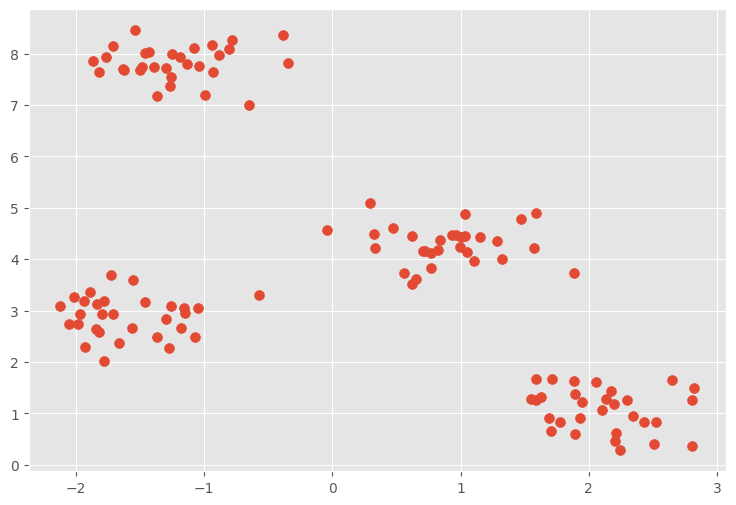

In [11]:
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], s=50); # s is the size of the dots in the plot

It is pretty clear that the data points belong to four different clusters. Let's use the various clustering algorithms we have learned about to find out how the data will be clustered.

<a id="sec2"></a>
## 2. K-Means

K-means clustering will divide data in k clusters, each with its own center. The algorithm works iteratively  
to group together data points that are spatially closer to one-another.

We will use the Kmeans algorithm that is implemented within the `sklearn` package.

All `sklearn` algorithms have the same API involving these steps:

1. initialize the model
2. fit the data to the model
3. validate the model or predict new values

Each of these steps is usually one single line of code.

In [12]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=4)  # step 1: initialize the model
kmeans.fit(X)                  # step 2: fit the data to the model
y_kmeans = kmeans.predict(X)   # step 3: prediction

Let's plot the results in order to see whether the clustering worked:

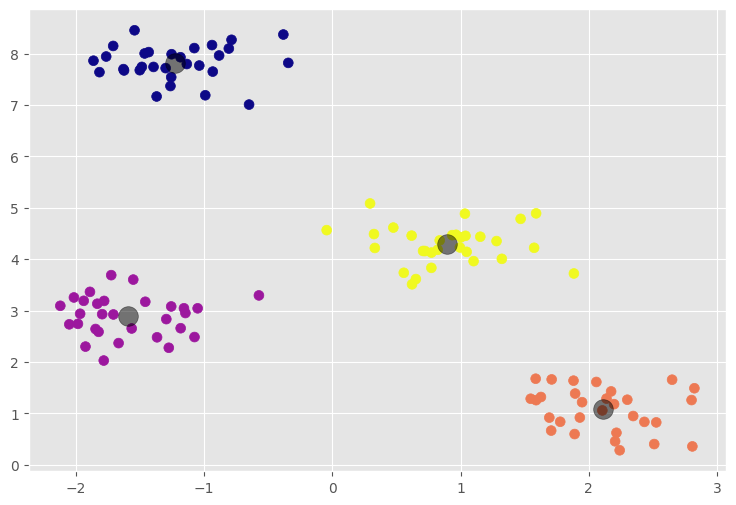

In [13]:
def plot_kmeans(kmeans, y_kmeans):
    """Helper function to plot the results of the kmeans clustering"""
    # Plot the points
    plt.figure(figsize=(9,6))
    plt.scatter(X[:, 0], # first column 
                X[:, 1], # second column
                c=y_kmeans, # indices for the color mapping
                s=50,  # size of a dot
                cmap='plasma') # color palette
    
    # Plot the cluster centers
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

plot_kmeans(kmeans, y_kmeans)

In [14]:
# The variable center stores the points that are the centroids of the clusters
centers

NameError: name 'centers' is not defined

Look up the coordinates of the centers in the plot and identify the clusters (first row is cluster 0, second row is cluster 1, and so on).

### Tighter data
We can play with the parameters of our data generation process to create different-looking clusters; for example clusters that are not well separated, by increasing the standard deviation:

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, # notice this is the double of std from the first example
                       random_state=0)

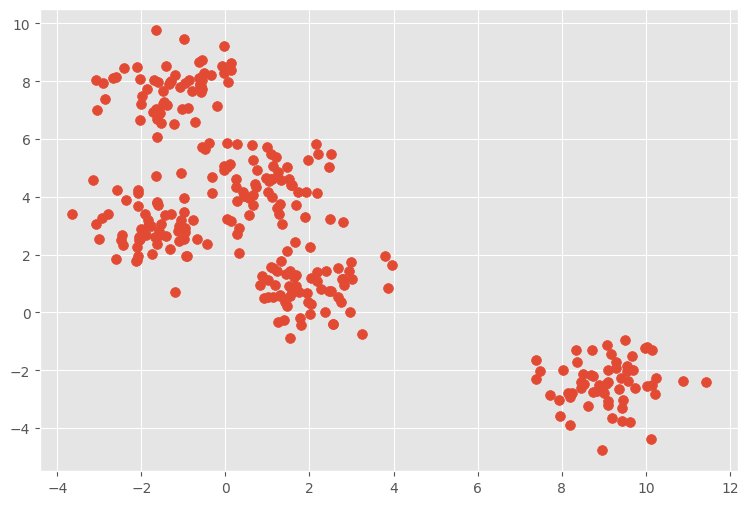

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], s=50); # s is the size of the dots in the plot

Let's see how good the k-means clustering algorithm will perform this time:

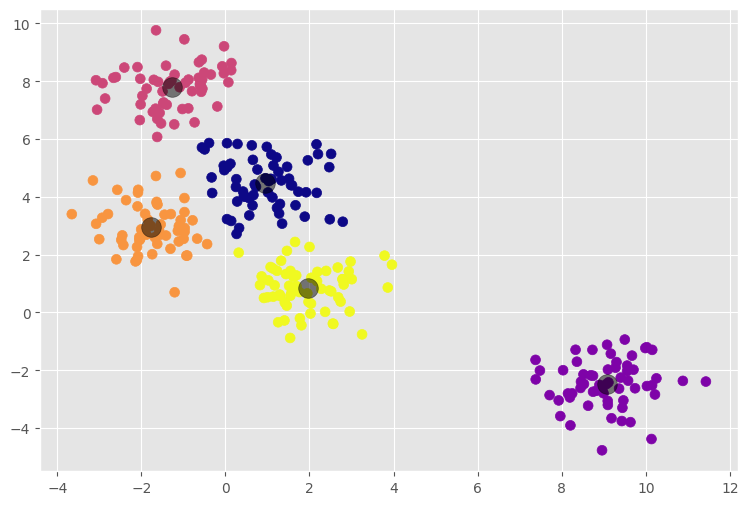

In [ ]:
# Perform clustering
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Do visualization
plot_kmeans(kmeans, y_kmeans)

It worked pretty well.

### Changing the number of clusters

Let's see what happens when we ask it to find 2 clusters, instead of the 5 natural clusters that are in the data:

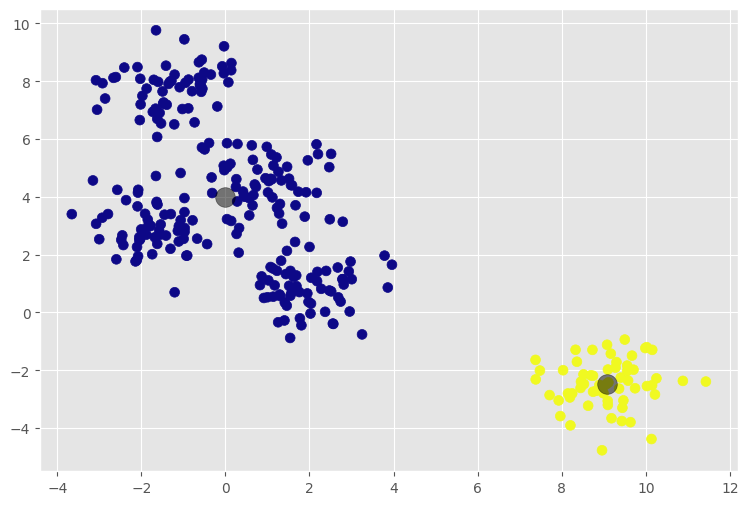

In [ ]:
# Perform clustering
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Do visualization
plot_kmeans(kmeans, y_kmeans)

This also makes sense!

Let's ask about 3 clusters:

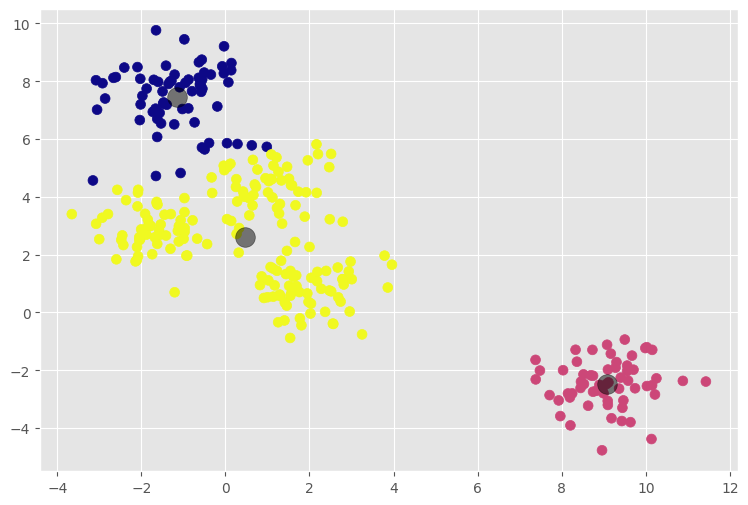

In [ ]:
# Perfom Clustering
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Do visualization
plot_kmeans(kmeans, y_kmeans)

The agorithm does the right thing even when we ask to find less clusters, thus, it's up to us to decide how many we want. For that, we can use the "Elbow Point"

### Visualizing the Elbow Point

The K-means algorithm tries to find centroids that minimise the **inertia**, which is the within-cluster sum-of-squares criterion. 

That is, for every point x, we find the square of the distance from its cluster's centroid and take the overall sums of all points in the cluster. The smaller this sum, the tighter the cluster, the better the clustering quality. The optimal number of clusters is where this error stops decreasin, which in a graph is shown as an **elbow point**.

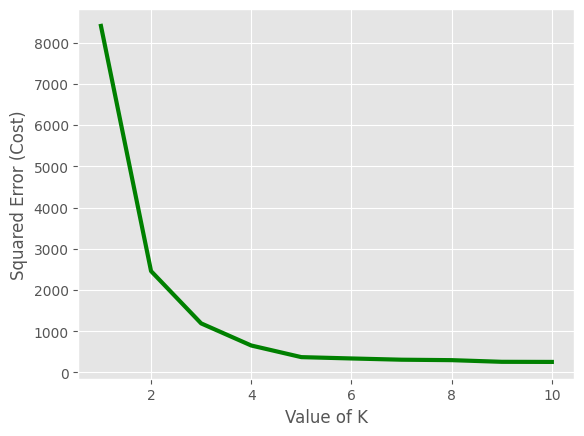

In [ ]:
def elbow_viz(X, num):

    # Perform clustering from 1 to num
    cost =[] 
    for i in range(1, num): 
        KM = KMeans(n_clusters = i) 
        KM.fit(X) 
          
        # calculates squared error for the clustered points 
        cost.append(KM.inertia_)      
      
    # plot the cost against K values 
    plt.plot(range(1, num), cost, color ='g', linewidth ='3') 
    plt.xlabel("Value of K") 
    plt.ylabel("Squared Error (Cost)") 
    plt.show() 

# Call function
elbow_viz(X, 11)

We definitively see a sharp decrease at k=2 (our data has the best separation at 2 clusers). However, we can also see that the inertia continues decreasing and it stops doing so at k=5 (between 4 and 6). 5 is the natural number of clusters in this synthetic dataset.

### Explorations

Let's explore the Elbow method a bit more. 

**Create three clusters**

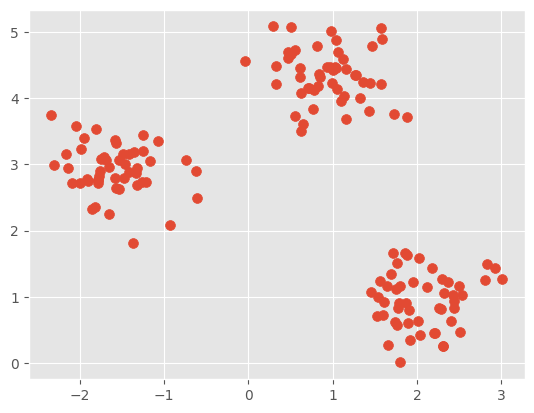

In [ ]:
# Create synthetic data
X, y_true = make_blobs(n_samples=150, 
                       centers=3,
                       cluster_std=0.40, 
                       random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50); 

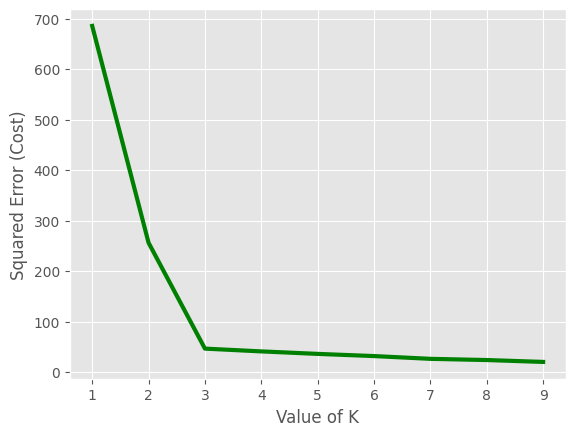

In [ ]:
elbow_viz(X, 10)

In this occasion, the number k=3 is very clear from the Elbow visualization.

**Create 7 clusters**

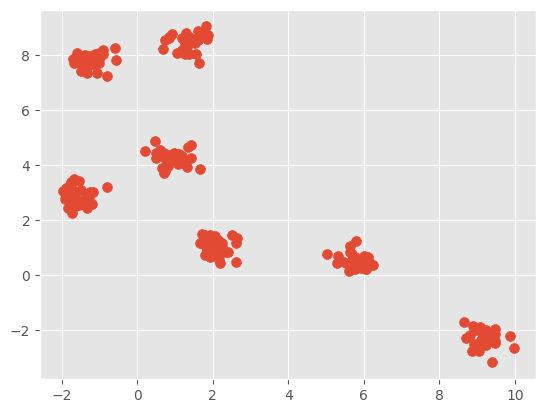

In [ ]:
# Create synthetic data
X, y_true = make_blobs(n_samples=210, 
                       centers=7,
                       cluster_std=0.30, 
                       random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50); 

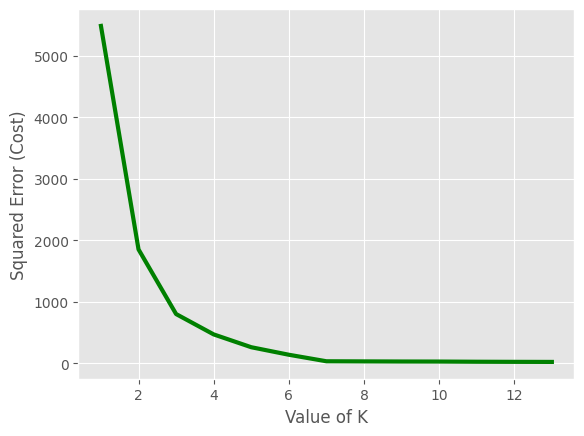

In [ ]:
elbow_viz(X, 14)

<a id="sec3"></a>
## 3. Agglomerative Clustering

In Kmeans clustering, we provide the number of clusters and then the algorithm partitions the data, so that they are clustered around a center point. 
In agglomerative clustering, the data points are grouped together based on distance from one another, and we can decide how many clusters we want, once we see how data are grouped together.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# linkage is the the function that performs the clustering
Z = linkage(X, 
            method='single', 
            metric='euclidean')

In [ ]:
# create string labels for the data samples, to show in the dendrogram
ticks = [f"el_{i}_group={el}" for i, el in enumerate(y_true)]

Draw the dendrogram (takes a few seconds):

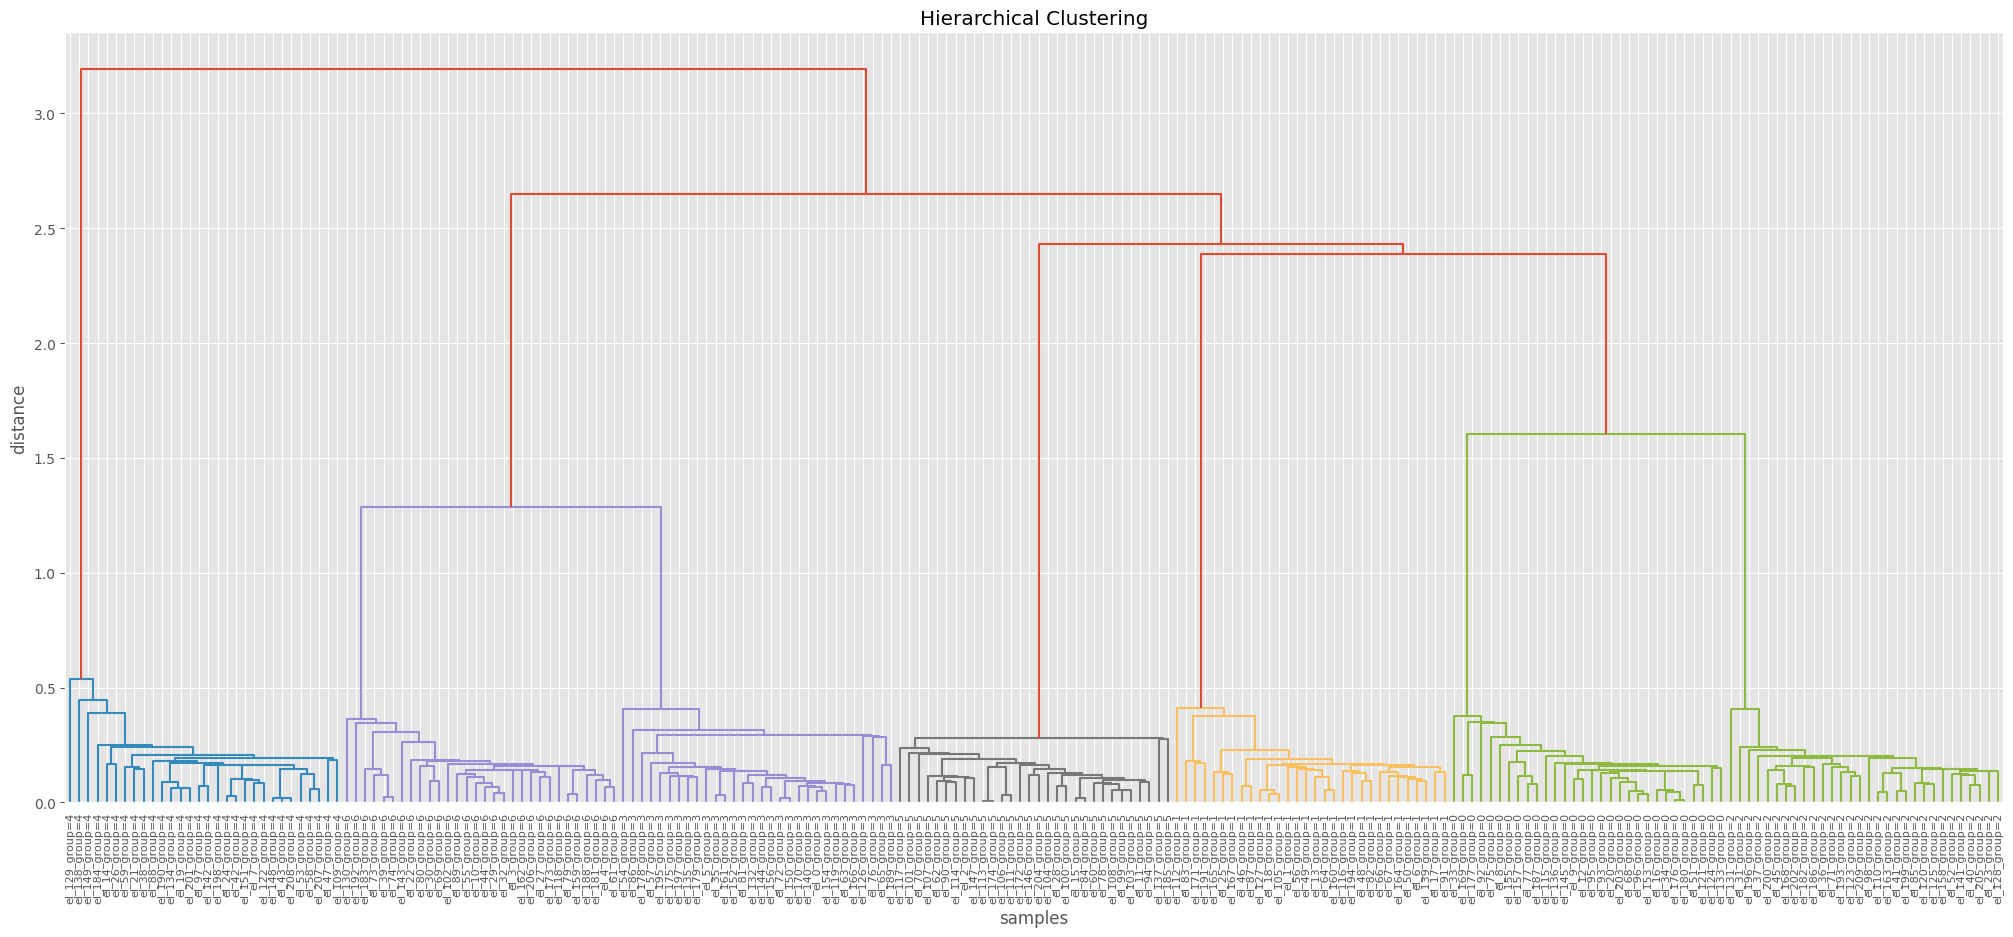

In [ ]:
def draw_dendrogram(Z, ticks):
    """Helper function to draw a dendrogram for testing purposes.
    """
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering')
    plt.xlabel('samples')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        labels = ticks
    )
    plt.show()
    
draw_dendrogram(Z, ticks)    

Something this makes clear is that visualizing the dendrogram is useful, but not that useful when we have many points. The dataset in the chart has a lot points, and it's currently hard to see the labels of the points.

### Create a smaller dataset
Let's create a smaller dataset that also is a bit more separated.

In [ ]:
X, y_true = make_blobs(n_samples=80, centers=3,
                       cluster_std=0.4, random_state=0)

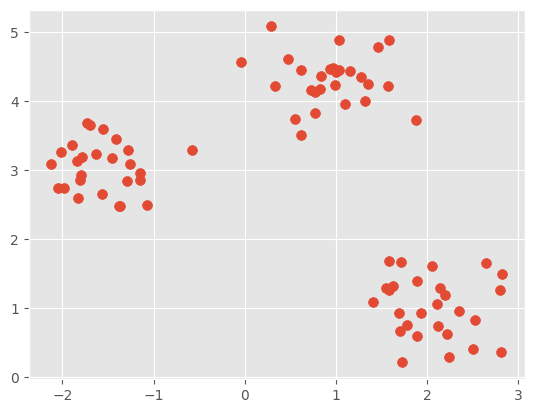

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=50);

Let's try the hierarchical clustering again:

In [ ]:
Z = linkage(X, method='single', metric='euclidean')

And now plot the dendrogram:

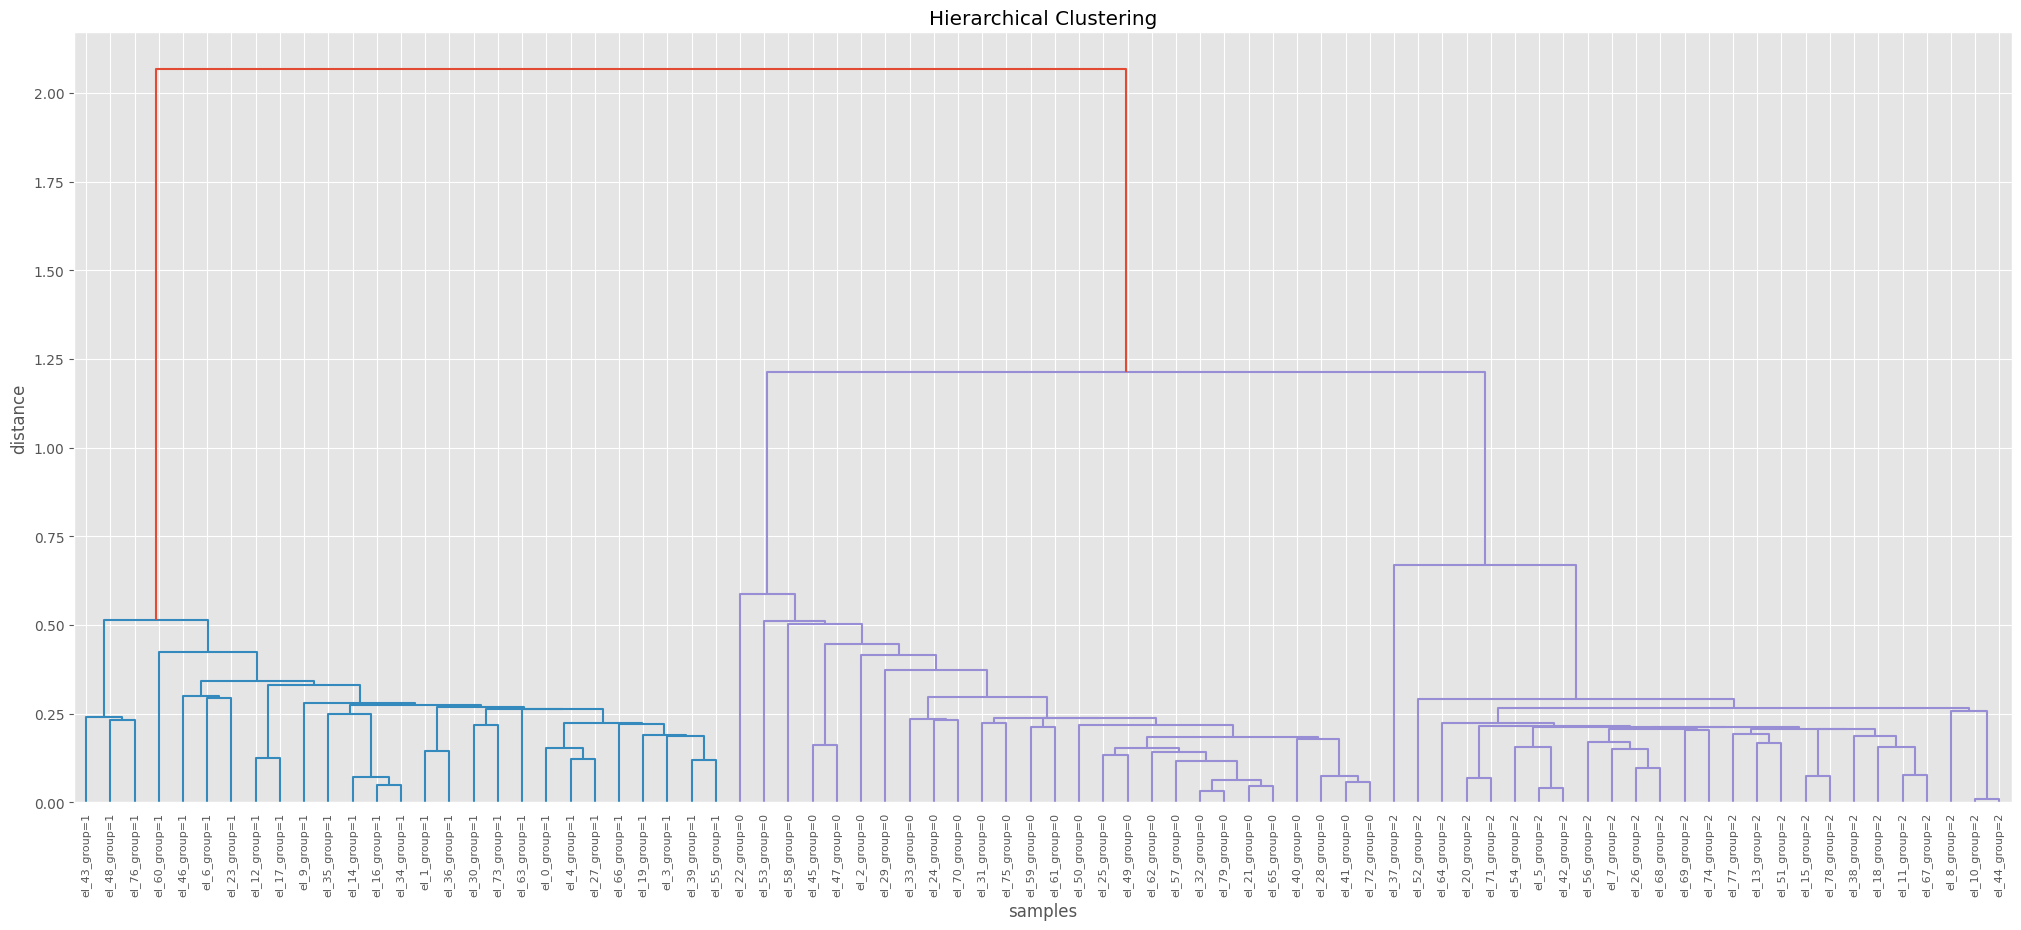

In [ ]:
ticks = ['el_{}_group={}'.format(i, el) for i, el in enumerate(y_true)]

draw_dendrogram(Z, ticks)

For this dataset, even the labels are visible. In fact, we can see how the original groups (notice the second part of name) are clustered together. The first cluster (left) contains points from group=1, the middle cluster contains points from group=0, and the cluster on the right contains points from group=2.

A final example:

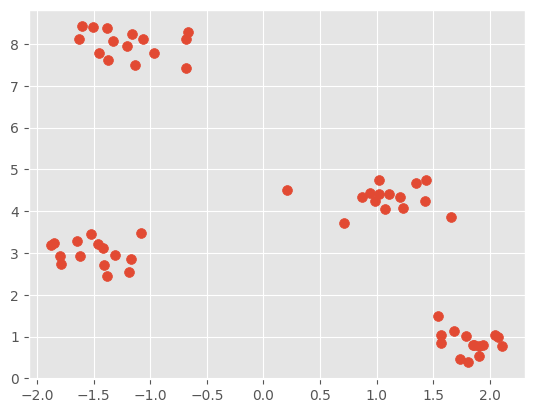

In [ ]:
X, y_true = make_blobs(n_samples=60, centers=4,
                       cluster_std=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

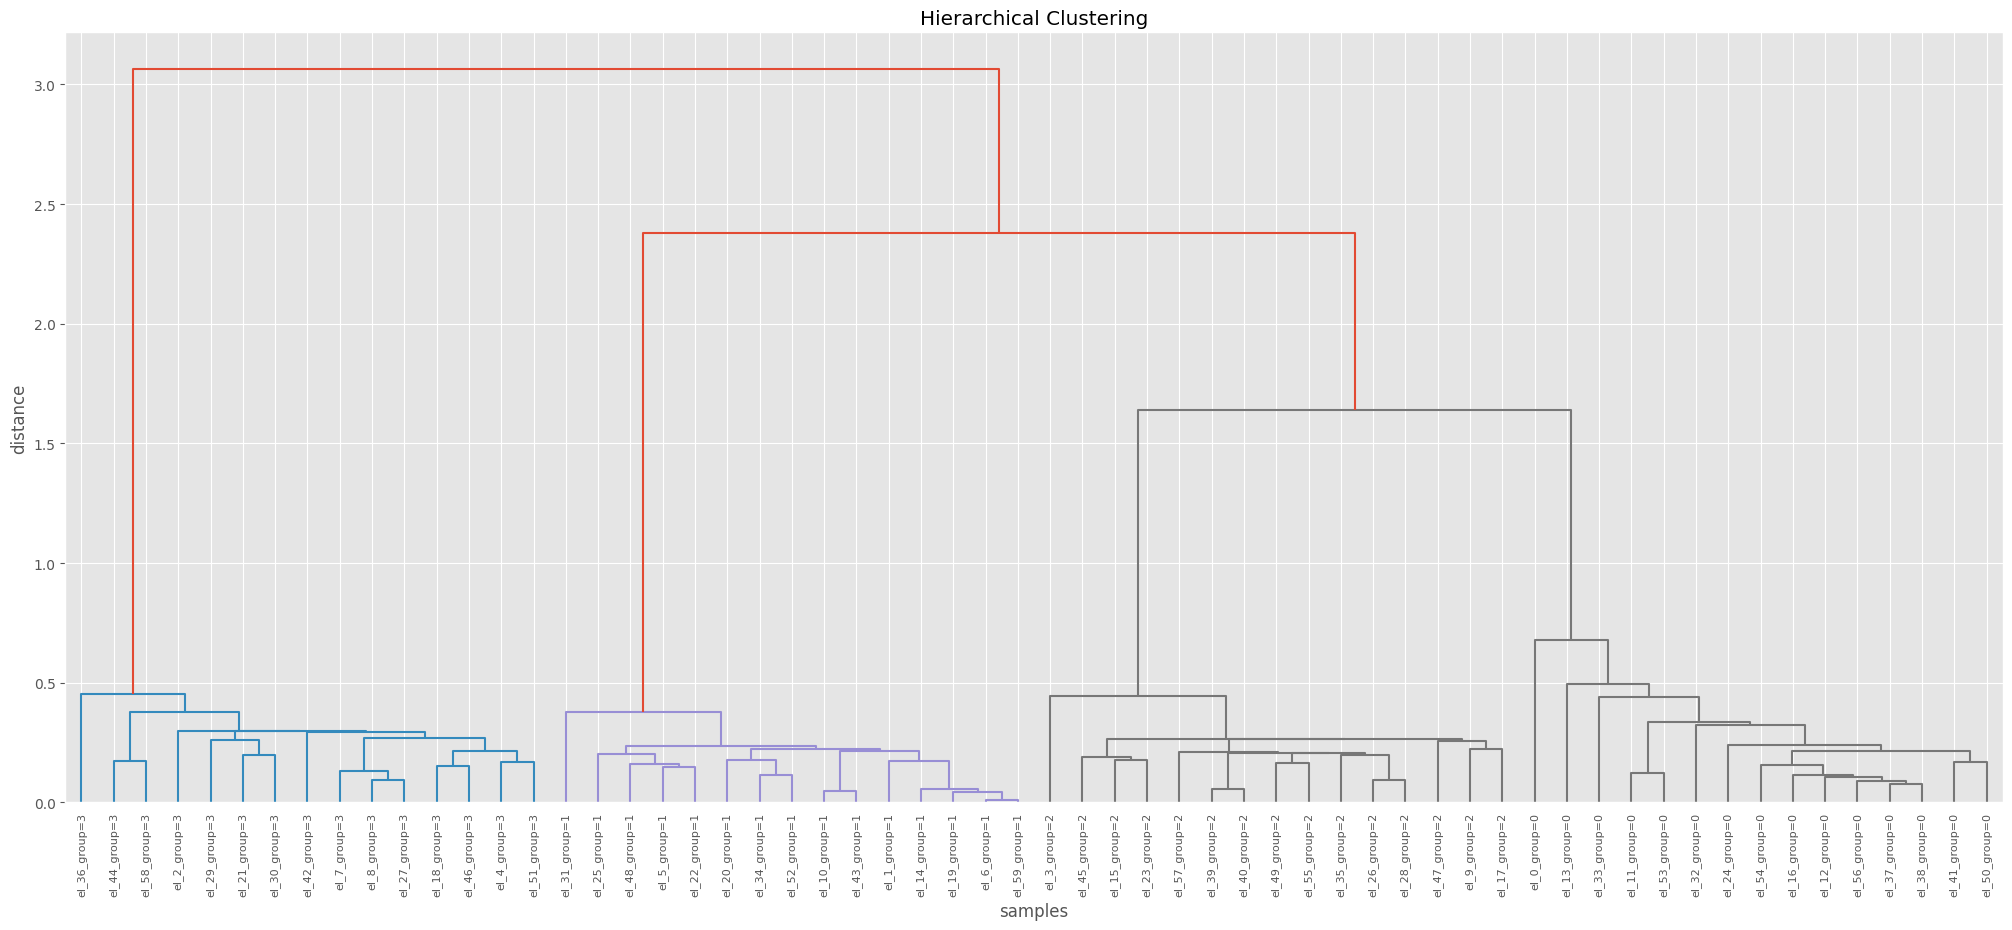

In [ ]:
Z = linkage(X, method='single', metric='euclidean')

ticks = ['el_{}_group={}'.format(i, el) for i, el in enumerate(y_true)]

draw_dendrogram(Z, ticks)

<a id="sec4"></a>
## 4. Distance metrics used in clustering

Clustering algorithms use various "distance metrics" to measure how far apart two points are in space. 

In `scipy` we can calculate the **pairwise distance** of every two data points with the function `pdist`:

In [ ]:
from scipy.spatial.distance import pdist

X, y_true = make_blobs(n_samples=80, centers=3,
                       cluster_std=0.4, random_state=0)

xdist = pdist(X, 'euclidean')
xdist.shape

(3160,)

**Question:** Why is the shape of the distance vector 3160? The dataset X has 80 points. What formula involving the data size n=80 will produce the result 3160? 

**Your answer:** I'm not completely sure, but it may have to do with the fact that (80*80)/2 = 3200 which is close to the result. I think it has to do with pairs of data together.

Let's look up the first 5 values of X first:

In [ ]:
X[:5]

array([[2.10603236, 1.05845941],
       [2.12623798, 0.73695129],
       [1.03388751, 4.88549673],
       [1.88981993, 0.59868174],
       [2.19781408, 1.18029293]])

Now let's look up the first 5 values of xdist:

In [ ]:
xdist[:5]

array([0.32214242, 3.97438162, 0.50807807, 0.1525362 , 4.64852341])

The first value in the xdist is the distance between points X[0] and X[1], that distance is small, because, as you can see below the values for X[0] and X[1], they are close.

In [ ]:
X[0], X[1]

(array([2.10603236, 1.05845941]), array([2.12623798, 0.73695129]))

However, the second value, 3.97438162, means that X[0] and X[2] are further apart, see values below:

In [ ]:
X[0], X[2]

(array([2.10603236, 1.05845941]), array([1.03388751, 4.88549673]))

We can see this even better if we do a scatterplot of only these five points and label the points with their index:

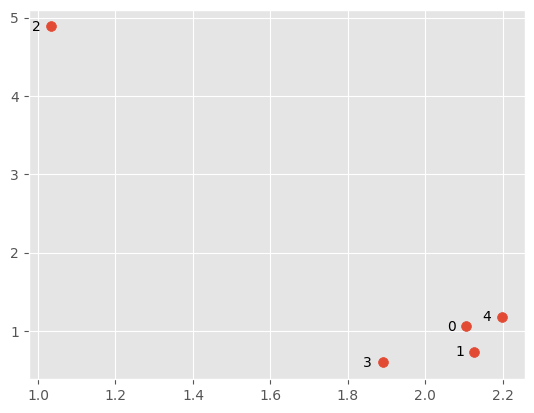

In [ ]:
# create an array with five points
X5 = X[:5]

# make scatterplot
plt.scatter(X5[:, 0], X5[:, 1], s=50)

# show text next to each point (notice the delta-s, to be slightly off the point)
for i in range(5):
    plt.text(X5[i,0]-0.05, X5[i,1]-0.05, s=f"{i}")

This shows clearly that the point 0 is very close to points 1 and 4 and somewhat to point 3, but is further away from point 2. As a reminder, these four distances (of the point 0 to the other 4 points) are captured by the first elements of xdist:

In [ ]:
xdist[:4]

array([0.32214242, 3.97438162, 0.50807807, 0.1525362 ])

**More distance metrics**

We only showed here the euclidean distance, but the function `pdist`, short for pairwise distance, has implementations of more than 20 different distance metrics, they are listed [on this page](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html). 

**Distance matrix**

Once we create a vector of pairwise distances with `pdist`, we can display them as a matrix, to create the so-called distance matrix, where we can look up the distance between any two points.

In [ ]:
from scipy.spatial.distance import squareform

distM = squareform(xdist) # make a matrix
distM.shape

(80, 80)

A distance matrix can be visualiazed through a heatmap. We can easily build one with seaborn:

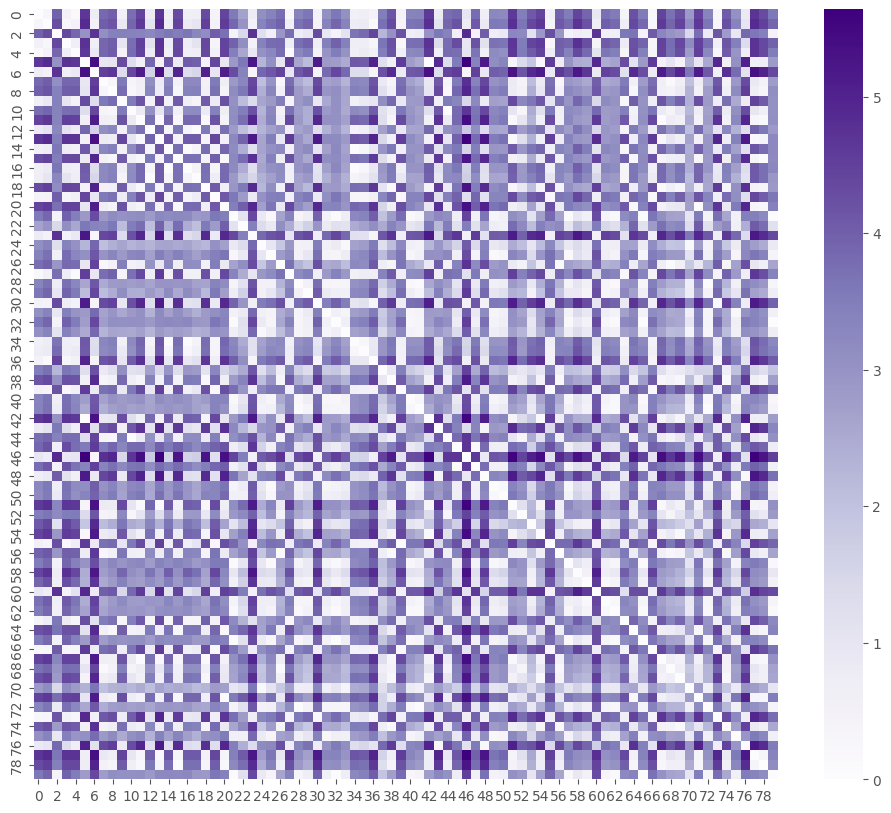

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(distM, cmap="Purples")
plt.show()

<a id="sec6"></a>

<a id="sec5"></a>
## 5. Clustering documents with k-means

We'll try clustering with a famous text dataset called 20newsgroups. Read a bit about its content on [this page](http://qwone.com/~jason/20Newsgroups/).

Because this is a famous dataset, `sklearn` already knows how to read its content from files. If you are curious about the files, download the ZIP archive from the website. Careful, it's a big file.

First, sklearn will get the dataset:

In [ ]:
import sklearn.datasets
all_data = sklearn.datasets.fetch_20newsgroups(subset='all')
print(len(all_data.filenames))

18846


It contains 18846 files in total, so, it's a big dataset.  

Documents are grouped in classes (a class is known as a target). Let's see these classes:

In [ ]:
print(all_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Because this dataset is usually used for text classification, it is divided in two parts: "train" data and "test" data. Both of these groups have examples with labels (the category where a piece of news belongs), but the algorithm will learn its model from the train data and then it is tested for accuracy (how well is doing) on the test data.

In [ ]:
train_data = sklearn.datasets.fetch_20newsgroups(subset='train')
print(len(train_data.filenames))

11314


In [ ]:
test_data = sklearn.datasets.fetch_20newsgroups(subset='test')
print(len(test_data.filenames))

7532


In this dataset, 60% of files are assigned to training and 40% are assigned to testing.

One doesn't need to work with all 20 groups at once, we can choose to focus on a subset:

In [15]:
groups = ['alt.atheism', 'comp.graphics', 'rec.autos', 
          'rec.sport.baseball', 'sci.med', 'talk.politics.guns']


train_data = sklearn.datasets.fetch_20newsgroups(subset='train', categories=groups)
test_data = sklearn.datasets.fetch_20newsgroups(subset='test', categories=groups)
print(len(train_data.filenames), len(test_data.filenames))

3395 2261


### Representing documents as vectors

Clustering works with vectors of numbers, thus, all documents need to be converted into such vectors. This is what we had to do in Assignment 6 as well. This process is known as vectorizing, and we used some vectorizers in Assignment 6. However, our features there were simple. When we are working with free text, the process needs to be more involved. Below we show a vectorizer that does two things together:

1. stemming of words (reducing a word to its stem, for example: "working"--> "work", etc.), 
2. calculation of tf*idf (the product of term frequency and the inverse document frequency) (for the moment, don't worry what these are, we'll discuss them in class briefly).

In [16]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

from sklearn.feature_extraction.text import TfidfVectorizer

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

**Choices**  
In addition to removing stop-words, getting stems, ignoring unicode characters that cannot be decoded, we are also dropping all words that appear less than 10 times (this will remove spelling mistakes or unusual acronyms), as well as words that appear in 50% of the documents. All these efforts are for the goal of reducing the dimensions of the problem (by having a smaller number of features).

In [17]:
vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5, 
                                    stop_words='english', 
                                    decode_error='ignore')

Let's fit the data to this vectorizer, it might take a few seconds to complete.

In [18]:
vectorized = vectorizer.fit_transform(train_data.data)
vectorized

<3395x5068 sparse matrix of type '<class 'numpy.float64'>'
	with 272628 stored elements in Compressed Sparse Row format>

**Explanation:**

- there are 3395 rows in the matrix, each of them representing a document (an email)
- there are 5068 columns in the matrix, each of them representing a feature (a stemmed word)
- such a matrix would have 17,205,860 cells, if not in sparse format. However, it's clear that each document will have only a few dozen words, thus most of the values in each row are 0. In fact, there is a toal of 272,628 non-zero values in this matrix.
- each non-zero cell contain the tf*idf value of the feature in a document.

We can use attributes and methods of the vectorizer to access more information about the model we have built. For example, we can look at the words (or the vocabulary of the corpus):

In [19]:
len(vectorizer.vocabulary_)

5068

This variable is a dictionary, so we can loop up some of its keys:

In [20]:
list(vectorizer.vocabulary_.items())[:10]

[('david', 1390),
 ('stat', 4303),
 ('com', 1147),
 ('medic', 2916),
 ('newslett', 3151),
 ('repli', 3802),
 ('distribut', 1548),
 ('world', 5000),
 ('gateway', 2049),
 ('servic', 4070)]

The words in the vocabulary are the feature names, we can verify that:

In [21]:
vectorizer.get_feature_names_out()[2730:2745]

array(['lib', 'liber', 'libertarian', 'liberti', 'librari', 'licenc',
       'licens', 'lie', 'life', 'lifetim', 'lift', 'light', 'lighter',
       'like', 'likelihood'], dtype=object)

### Apply Clustering

Lets initialize the clustering algorithm:

In [22]:
from sklearn.cluster import KMeans
num_clusters = 12
km = KMeans(n_clusters=num_clusters, 
            init='random', 
            n_init=3, 
            verbose=1, 
            random_state=3)

We can fit the model to the data, meaning, we'll find the parameters for the 12 clusters (coordinates of the centroids). I set **verbose=1**, so that we can see the process of iteration in order to converge to cluster centers.

In [23]:
km.fit(vectorized)

Initialization complete
Iteration 0, inertia 6282.729302736987.
Iteration 1, inertia 3240.6266365202814.
Iteration 2, inertia 3213.9182071648147.
Iteration 3, inertia 3203.6508220396954.
Iteration 4, inertia 3198.037530926683.
Iteration 5, inertia 3192.942633958228.
Iteration 6, inertia 3189.0094917013485.
Iteration 7, inertia 3185.9201360441984.
Iteration 8, inertia 3183.5618062996346.
Iteration 9, inertia 3181.374907224491.
Iteration 10, inertia 3179.6352081116866.
Iteration 11, inertia 3178.430891503118.
Iteration 12, inertia 3177.3193767716557.
Iteration 13, inertia 3176.7601952063046.
Iteration 14, inertia 3176.409663940529.
Iteration 15, inertia 3176.1659113059086.
Iteration 16, inertia 3175.9120375187185.
Iteration 17, inertia 3175.7584143551503.
Iteration 18, inertia 3175.6134649614737.
Iteration 19, inertia 3175.498863733198.
Iteration 20, inertia 3175.296806304219.
Iteration 21, inertia 3175.20048320972.
Iteration 22, inertia 3175.145395970994.
Iteration 23, inertia 3175.1076

KMeans(init='random', n_clusters=12, n_init=3, random_state=3, verbose=1)

The variable `labels_` will indicate for every document the number of cluster to which the document has been assigned.

In [24]:
km.labels_

array([ 3, 11,  6, ...,  2,  9,  2], dtype=int32)

This array tells us that the first document was assigned to cluster 26, the second document to cluster 12, the third document to cluster 25, etc.

We can check that there is a label assigned to every document, by printing the lengths of the list:

In [25]:
len(km.labels_)

3395

We can look at all centers, there are large vectors:

In [26]:
km.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00478317, 0.00290165, 0.        , ..., 0.        , 0.00063519,
        0.        ],
       [0.00051036, 0.00361338, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00150498, 0.01707749, 0.        , ..., 0.        , 0.00041611,
        0.        ],
       [0.00102464, 0.00312088, 0.01254493, ..., 0.        , 0.00191605,
        0.        ],
       [0.00188161, 0.00109383, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
km.cluster_centers_.shape

(12, 5068)

That is, we have 12 centers, each a vector of 5068 dimensions.

Let's print out one centroid, it should be a long array of numbers (tf-idf values) for different features(words) that are relevant to the cluster. Values 0 mean that the feature is not present. 

In [28]:
print(list(km.cluster_centers_[0])[:50])

[0.0, 0.0, 0.0, 0.001892139128807013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009511152724712903, 0.0, 0.0013948526031487267, 0.0, 0.0, 0.0, 0.0016209808293441107, 0.0, 0.0, 0.0004390934510323437, 0.0022172202138879835, 0.0, 0.0, 0.0, 0.0, 0.00443009503291556, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005426278376064148, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006447978698506703, 0.0, 0.0, 0.0, 0.0, 0.0]


### Explore Clusters

Let's see how many documents are in each cluster:

In [29]:
from collections import Counter
labelsCnt = Counter(km.labels_)

for k in sorted(labelsCnt):
    print(k, labelsCnt[k])

0 106
1 295
2 312
3 276
4 184
5 377
6 968
7 299
8 74
9 269
10 118
11 117


The data seem to be spread out across all clusters, but some clusters are much bigger than others, for example, cluster 3.

Each cluster stores the indices of the documents assigned to a cluster. Let's get the indices for one cluster:

In [30]:
# we will find the document indices that were assigned the label 1

indices = [i for i in range(len(km.labels_)) if km.labels_[i] == 1]
len(indices)

295

In [31]:
print(indices)

[39, 57, 63, 64, 101, 114, 124, 137, 144, 153, 154, 155, 161, 172, 181, 191, 199, 210, 234, 238, 264, 271, 280, 284, 288, 291, 293, 297, 314, 360, 369, 373, 386, 389, 402, 407, 423, 435, 437, 440, 454, 471, 480, 485, 493, 499, 500, 513, 530, 539, 557, 567, 572, 585, 620, 628, 630, 668, 679, 709, 731, 741, 756, 766, 789, 791, 794, 799, 806, 821, 831, 835, 842, 846, 874, 905, 916, 924, 929, 935, 940, 967, 987, 995, 996, 999, 1020, 1030, 1033, 1081, 1090, 1118, 1121, 1127, 1135, 1147, 1159, 1176, 1190, 1199, 1201, 1229, 1231, 1238, 1245, 1248, 1286, 1291, 1296, 1301, 1336, 1372, 1384, 1387, 1392, 1404, 1413, 1432, 1453, 1457, 1459, 1466, 1485, 1499, 1511, 1512, 1551, 1563, 1572, 1585, 1600, 1622, 1624, 1638, 1642, 1645, 1668, 1676, 1681, 1699, 1706, 1708, 1727, 1738, 1745, 1758, 1776, 1785, 1794, 1829, 1837, 1863, 1883, 1895, 1914, 1917, 1925, 1947, 1953, 1975, 1982, 1983, 1999, 2007, 2010, 2028, 2029, 2044, 2052, 2064, 2065, 2093, 2103, 2113, 2133, 2144, 2159, 2164, 2185, 2198, 2202, 221

These indices allow us to access the documents and their labels, for example, here is how to get the text of the document:

In [32]:
train_data.data[indices[0]]

"From: snichols@adobe.com (Sherri Nichols)\nSubject: Re: Braves Pitching UpdateDIR\nOrganization: Adobe Systems Incorporated\nLines: 13\n\nIn article <1993Apr15.010745.1@acad.drake.edu> sbp002@acad.drake.edu writes:\n>or second starter.  It seems to me that when quality pitchers take the\n>mound, the other teams score less runs.  The team that scores the most \n>runs wins.  This puts the team with the better pitching at the advantage\n>(providing they can stop the opposing team from scoring runs).  A low \n>scoring game would clearly benefit the Braves. \n\nNot clear to me at all.  I'd certainly rather have a team who was winning\n4-1 games than 2-1 games.  In the 2-1 game, luck is going to play a much\nbigger role than in the 4-1 game. \n\nSherri Nichols\nsnichols@adobe.com\n"

And here is how to get the that target label and its name

In [33]:
train_data.target[indices[0]], train_data.target_names[train_data.target[indices[0]]]

(3, 'rec.sport.baseball')

Using this relationship between target and target_names, it is possible for us to look at the original labels of all documents in Cluster 1:

In [34]:
targetNames = [train_data.target_names[train_data.target[docID]] for docID in indices]
Counter(targetNames).most_common()

[('rec.sport.baseball', 295)]

So, in this cluster, there are 50 emails from 'rec.autos', 22 emails from 'comp.graphics' and 9 emails from 'sci.med'. We will do this for all the clusters, let's checks where there instances are coming from:

In [35]:
for label in labelsCnt:
    indices = [i for i in range(len(km.labels_)) if km.labels_[i] == label]
    targetNames = [train_data.target_names[train_data.target[docID]] for docID in indices]
    print(f"Cluster: {label}")
    print(Counter(targetNames).most_common())

Cluster: 3
[('sci.med', 275), ('talk.politics.guns', 1)]
Cluster: 11
[('talk.politics.guns', 114), ('rec.autos', 2), ('sci.med', 1)]
Cluster: 6
[('sci.med', 238), ('rec.autos', 214), ('rec.sport.baseball', 181), ('talk.politics.guns', 162), ('comp.graphics', 110), ('alt.atheism', 63)]
Cluster: 5
[('rec.autos', 375), ('talk.politics.guns', 1), ('comp.graphics', 1)]
Cluster: 9
[('talk.politics.guns', 267), ('rec.autos', 1), ('alt.atheism', 1)]
Cluster: 10
[('rec.sport.baseball', 118)]
Cluster: 4
[('comp.graphics', 180), ('rec.sport.baseball', 3), ('sci.med', 1)]
Cluster: 7
[('comp.graphics', 293), ('sci.med', 5), ('rec.autos', 1)]
Cluster: 2
[('alt.atheism', 311), ('talk.politics.guns', 1)]
Cluster: 1
[('rec.sport.baseball', 295)]
Cluster: 8
[('sci.med', 74)]
Cluster: 0
[('alt.atheism', 105), ('rec.autos', 1)]


As we can see, some of these clusters are really good, because they contain emails from a single newgroup (such as baseball) or the majority of documents from one newsgroup. Meanwhile, a few other clusters have documents from several newsgroups. This indicates that we might need to increase the number of clusters to get clusters that are more homogenous.

**Conclusion:** This example shows that even when working with messy text documents (such as emails), it's possible to perform clustering and find meaningful clusters. Remember, when we did the clustering, we did not provide any labels to the model, this is unsupervised learning. Thus, the groups that we see are automatically coming from the similarity of the documents. 